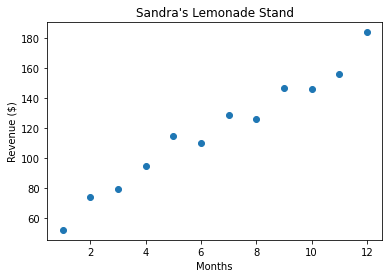

In [1]:
import matplotlib.pyplot as plt

months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

plt.plot(months, revenue, "o")

plt.title("Sandra's Lemonade Stand")

plt.xlabel("Months")
plt.ylabel("Revenue ($)")

plt.show()


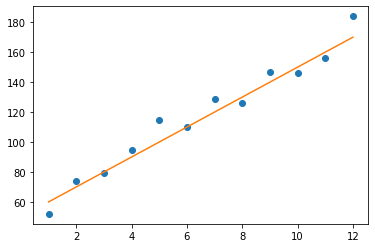

In [2]:
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

#slope:
m = 10
#intercept:
b = 50
y = [(m * x + b) for x in months]
plt.plot(months, revenue, "o")
plt.plot(months, y)

plt.show()


##### Loss

In [3]:
x = [1, 2, 3]
y = [5, 1, 3]

#y = x
m1 = 1
b1 = 0

#y = 0.5x + 1
m2 = 0.5
b2 = 1
y_predicted1 = [(m1 * i + b1) for i in x ]
y_predicted2 = [(m2 * i + b2) for i in x]
total_loss1 = 0
for i in range(len(y)):
  diff = y[i] - y_predicted1[i]
  diff = diff ** 2
  total_loss1 += diff

total_loss2 = 0
for i in range(len(y)):
  diff = y[i] - y_predicted2[i]
  diff = diff ** 2
  total_loss2 += diff

print(total_loss1)
print(total_loss2)

better_fit = 2

17
13.5


##### Gradient Descent for Intercept

In [4]:
def get_gradient_at_b(x, y, m, b):
    diff = 0
    for i in range(len(x)):
        t = y[i] - (m * x[i] + b )
        diff += t
    N = len(x)
    b_gradient = -2/N * diff
    return b_gradient 

##### Gradient Descent for Slope

In [5]:
def get_gradient_at_m(x, y, m, b):
    N = len(x)
    diff  = 0
    for i in range(len(x)):
        diff += x[i] * (y[i] - (m * x[i] + b))
        m_gradient = -2/N * diff
    return m_gradient

##### Putting it Together

In [6]:
def step_gradient(x, y, b_current, m_current):
    b_gradient = get_gradient_at_b(x, y, b_current, m_current)
    m_gradient = get_gradient_at_m(x, y, b_current, m_current)
    b = b_current - (0.01 * b_gradient)
    m = m_current - (0.01 * m_gradient)
    return [b, m]

months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

# current intercept guess:
b = 0
# current slope guess:
m = 0

# Call your function here to update b and m
b, m = step_gradient(months, revenue, b, m)
print(b, m)

2.355 17.78333333333333


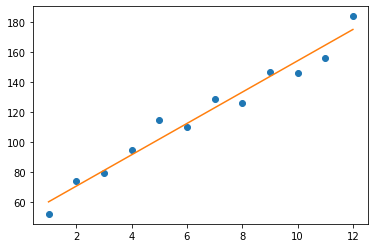

In [7]:
def get_gradient_at_b(x, y, b, m):
    N = len(x)
    diff = 0
    for i in range(N):
        x_val = x[i]
        y_val = y[i]
        diff += (y_val - ((m * x_val) + b))
    b_gradient = -(2/N) * diff  
    return b_gradient

def get_gradient_at_m(x, y, b, m):
    N = len(x)
    diff = 0
    for i in range(N):
        x_val = x[i]
        y_val = y[i]
        diff += x_val * (y_val - ((m * x_val) + b))
    m_gradient = -(2/N) * diff  
    return m_gradient

#Your step_gradient function here
def step_gradient(b_current, m_current, x, y, learning_rate):
    b_gradient = get_gradient_at_b(x, y, b_current, m_current)
    m_gradient = get_gradient_at_m(x, y, b_current, m_current)
    b = b_current - (learning_rate * b_gradient)
    m = m_current - (learning_rate * m_gradient)
    return [b, m]
  
#Your gradient_descent function here:  
def gradient_descent(x, y, learning_rate, num_iterations):
    b = 0
    m = 0
    for i in range(num_iterations):
        b, m = step_gradient(b, m, x, y, learning_rate)
    return [b, m]

months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

#Uncomment the line below to run your gradient_descent function
b, m = gradient_descent(months, revenue, 0.01, 1000)

#Uncomment the lines below to see the line you've settled upon!
y = [m*x + b for x in months]

plt.plot(months, revenue, "o")
plt.plot(months, y)

plt.show()

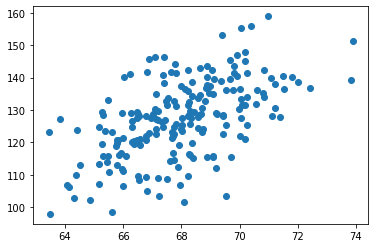

In [8]:
from gradient_descent_funcs import gradient_descent
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/elorm/Documents/Repos/Datasets/heights.csv')

X = df["height"]
y = df["weight"]

plt.plot(X, y, 'o')
#plot your line here:

plt.show()

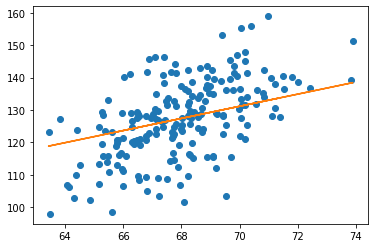

In [9]:
b, m = gradient_descent(X, y, num_iterations = 1000, learning_rate = 0.0001)

y_predictions = [(a * m + b) for a in X]
plt.plot(X, y, 'o')
plt.plot(X, y_predictions)
plt.show()

##### scikit-learn

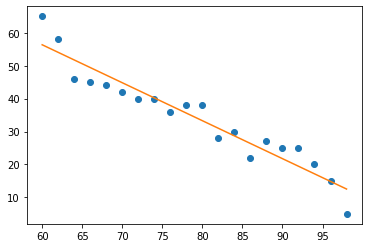

In [10]:
from sklearn.linear_model import LinearRegression
import numpy as np
temperature = np.array(range(60, 100, 2))
temperature = temperature.reshape(-1, 1)
sales = [65, 58, 46, 45, 44, 42, 40, 40, 36, 38, 38, 28, 30, 22, 27, 25, 25, 20, 15, 5]

line_fitter = LinearRegression()
line_fitter.fit(temperature, sales)

sales_predict = line_fitter.predict(temperature)
plt.plot(temperature, sales, 'o')
plt.plot(temperature, sales_predict)
plt.show()

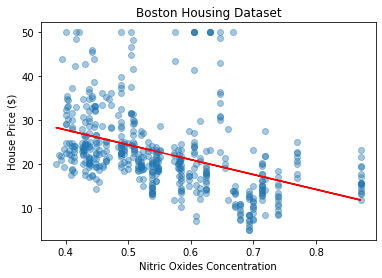

In [11]:
from sklearn.datasets import load_boston

# Boston housing dataset
boston = load_boston()

df = pd.DataFrame(boston.data, columns = boston.feature_names)

# Set the x-values to the nitrogen oxide concentration:
X = df[['NOX']]
# Y-values are the prices:
y = boston.target

# Can we do linear regression on this?
line_fitter = LinearRegression()
line_fitter.fit(X, y)

house_price_prediction = line_fitter.predict(X)




plt.scatter(X, y, alpha=0.4)
# Plot line here:
plt.plot(X, house_price_prediction, color = 'red')

plt.title("Boston Housing Dataset")
plt.xlabel("Nitric Oxides Concentration")
plt.ylabel("House Price ($)")
plt.show()

### Honey Production
As you may have already heard, the honeybees are in a precarious state right now. You may have seen articles about the decline of the honeybee population for various reasons. You want to investigate this decline and how the trends of the past predict the future for the honeybees.

In [12]:
import numpy as np
from sklearn import linear_model
df = pd.read_csv('/Users/elorm/Documents/Repos/Datasets/honeyproduction.csv')
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [13]:
prod_per_year = df.groupby('year')['totalprod'].mean().reset_index()
prod_per_year

,year,totalprod
0,1998,5.105093e+06
1,1999,4.706674e+06
2,2000,5.106000e+06
3,2001,4.221545e+06
4,2002,3.892386e+06
5,2003,4.122091e+06
6,2004,4.456805e+06
7,2005,4.243146e+06
8,2006,3.761902e+06
9,2007,3.600512e+06


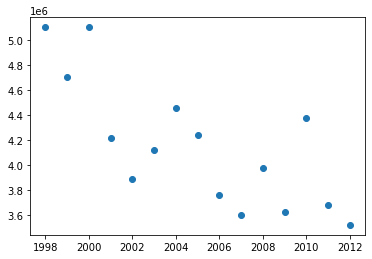

In [14]:
X = prod_per_year['year']
X = X.values.reshape(-1, 1)
y = prod_per_year['totalprod']

plt.scatter(X, y)
plt.show()

In [15]:
#Create and Fit a Linear Regression Model
regr = linear_model.LinearRegression()
regr.fit(X, y)
print('Slope:', regr.coef_)
print('Intercept:', regr.intercept_)

Slope: [-88303.18915238]
Intercept: 181208083.1073298


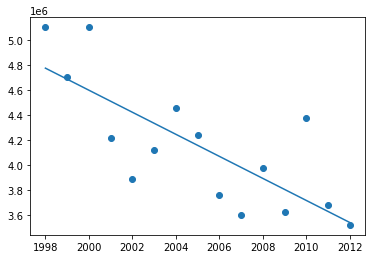

In [16]:
y_predict = regr.predict(X)
plt.plot(X, y_predict)
plt.scatter(X, y)
plt.show()

[2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026
 2027 2028 2029 2030 2031 2032 2033 2034 2035 2036 2037 2038 2039 2040
 2041 2042 2043 2044 2045 2046 2047 2048 2049 2050]


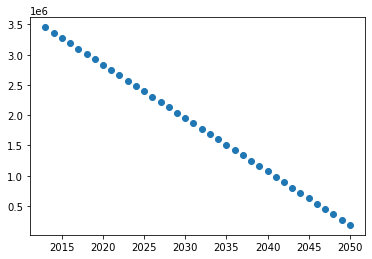

In [17]:
##Predict the Honey Decline
X_future = np.array(range(2013, 2051))
print(X_future)
X_future = X_future.reshape(-1, 1)
#print(X_future)

future_predict = regr.predict(X_future)
plt.scatter(X_future, future_predict)
plt.show()


No honey will be produced by 2050.